# Visualizing the predictions from your KNN classifier

Visualizing our data and the predictions we make can be informative to how well our prediction algorithm is working. Let's visualize our training data and the predictions for our test data.

In [28]:
%config InlineBackend.figure_format = 'retina'
from src.knn import Knn_classification

In [29]:
import pandas as pd

# Load our data
data_train = pd.read_csv("data/train.csv")
data_test = pd.read_csv("data/test.csv")

x_train = data_train[['SepalWidthCm', 'PetalWidthCm']].values
y_train = data_train[['Species']].values

x_test = data_test[['SepalWidthCm', 'PetalWidthCm']].values
y_test = data_test[['Species']].values

# Initialize the KNN model
myknn = Knn_classification()

# Train the model
myknn.fit(x_train,y_train)

# Make predictions on the test data
k = 5
y_prediction = myknn.predict(x_test,k)
y_prediction

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor'], dtype='<U15')

Let's start by gathering our visualization code from earlier when we were exploring our data

As we're doing this, we'll build a function for visualizing the data. Let's start with visualizing our data by class. We have three classes: ['Iris-setosa', 'Iris-versicolor' ,'Iris-virginica']. Let's plot each class as a different color (you can find a full list of colors for matplotlib [here](https://matplotlib.org/stable/gallery/color/named_colors.html)). We'll develop a plotting function along the way to better display them. To start off with, we'll want to determine the observations in the training data that have each type of label and plot them in that color. We'll assume the features are two dimensional for this, which they are for our example.

Text(0, 0.5, 'Sepal Width (cm)')

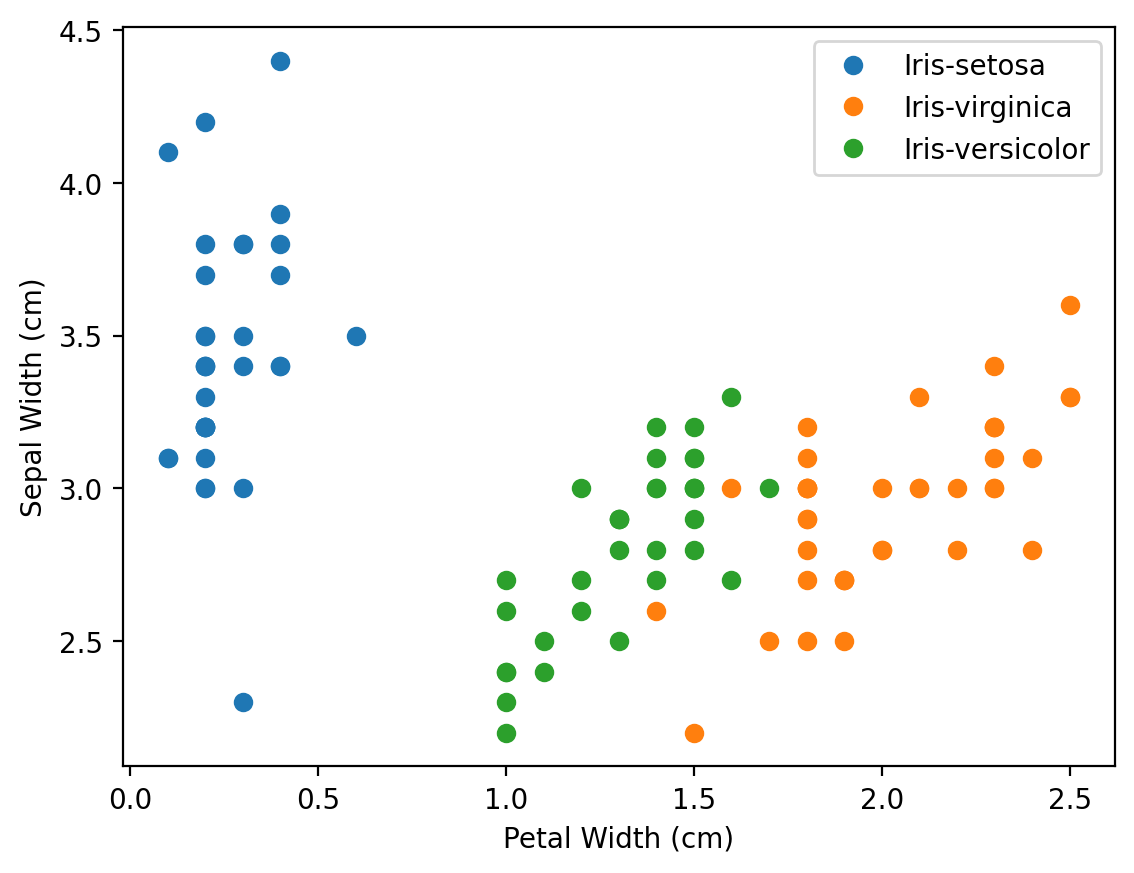

In [30]:
import matplotlib.pyplot as plt

# Get each unique type of label
class_labels = data_train['Species'].unique()

fig, ax = plt.subplots()

# Loop through each of the class labels and plot them
for label in class_labels:
    # Get the data that have that label
    data_subset = data_train.loc[data_train['Species'] == label]
    ax.plot(data_subset['PetalWidthCm'],data_subset['SepalWidthCm'],linestyle='',marker='o',label=label)
ax.legend()
ax.set_xlabel('Petal Width (cm)')
ax.set_ylabel('Sepal Width (cm)')

Now, let's place this into a function that we can use to plot on any axis that we feed in, so that we could make subplots easily of both the training and test data.

In [31]:
# Get each unique type of label

def plot_data_with_labels(ax, data):
    class_labels = data['Species'].unique()

    # Loop through each of the class labels and plot them
    for label in class_labels:
        # Get the data that have that label
        data_subset = data.loc[data['Species'] == label]
        ax.plot(data_subset['PetalWidthCm'],data_subset['SepalWidthCm'],linestyle='',marker='o',label=label)
    ax.legend()
    ax.set_xlabel('Petal Width (cm)')
    ax.set_ylabel('Sepal Width (cm)')

Now let's see this in action:

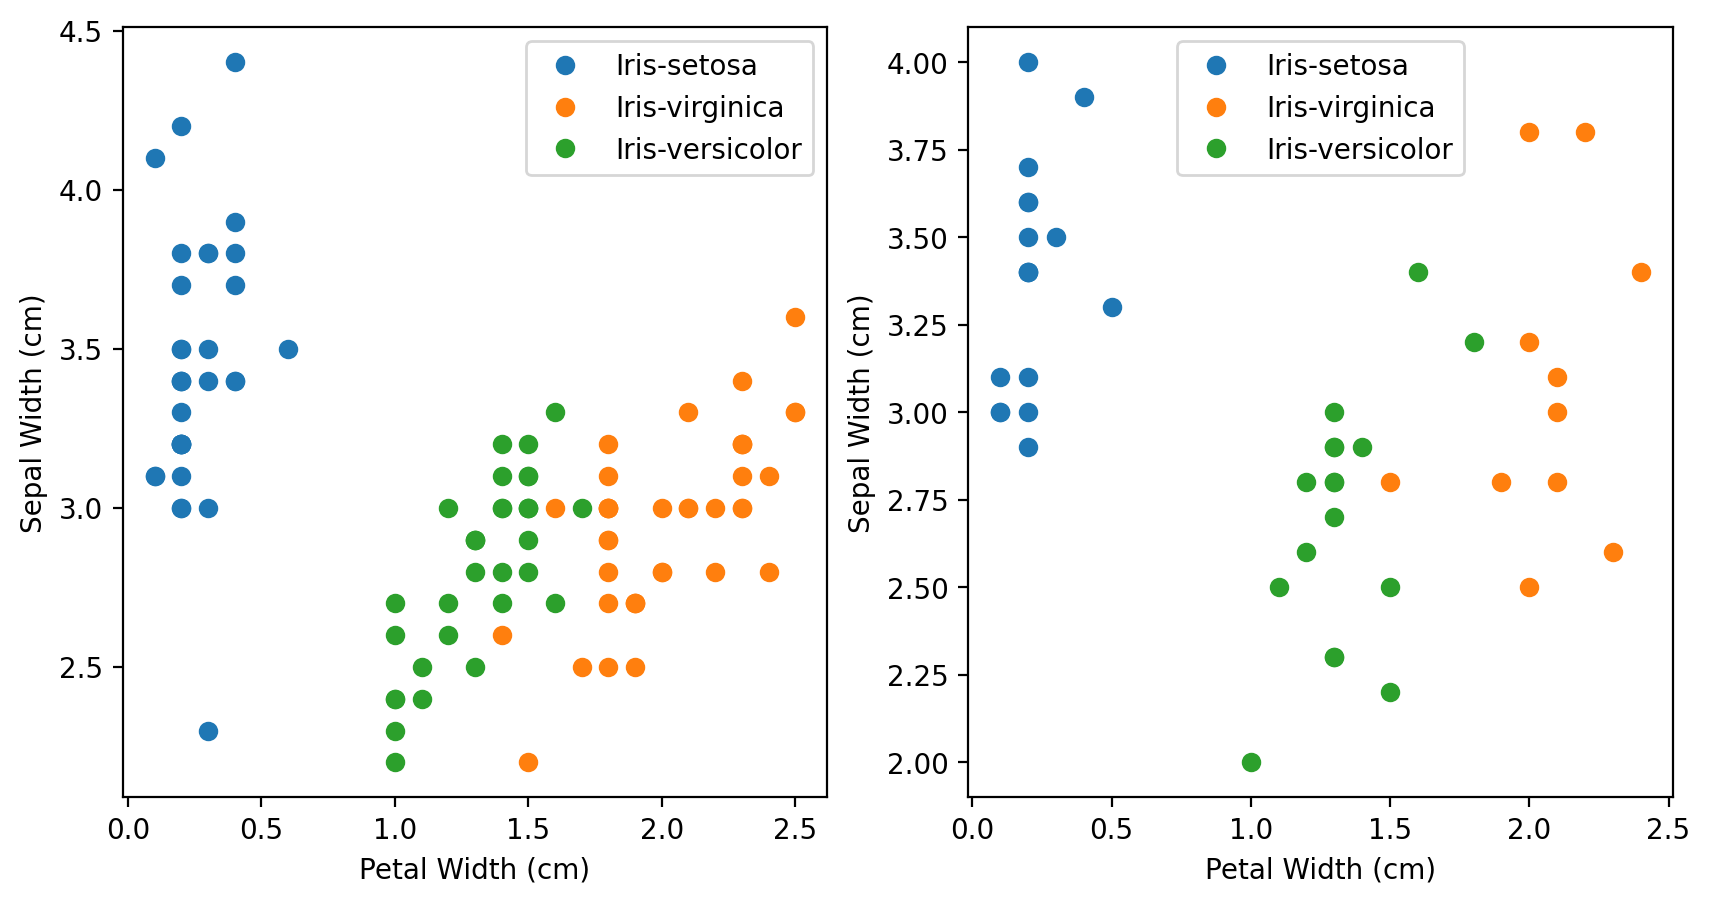

In [32]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,5))
plot_data_with_labels(ax1, data_train)
plot_data_with_labels(ax2, data_test)

This is looking very good, but we do have a couple of issues: first, the label colors changed from one plot to the next because of the order in which the labels appeared. Secondly, we haven't labeled which is the training data and which is the test data. Let's explicitly set what the labels are so the order is always consistent:

In [33]:
def plot_data_with_labels(ax, data, labels, title):
    # Loop through each of the class labels and plot them
    for label in labels:
        # Get the data that have that label
        data_subset = data.loc[data['Species'] == label]
        ax.plot(data_subset['PetalWidthCm'],data_subset['SepalWidthCm'],linestyle='',marker='o',label=label)
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel('Petal Width (cm)')
    ax.set_ylabel('Sepal Width (cm)')

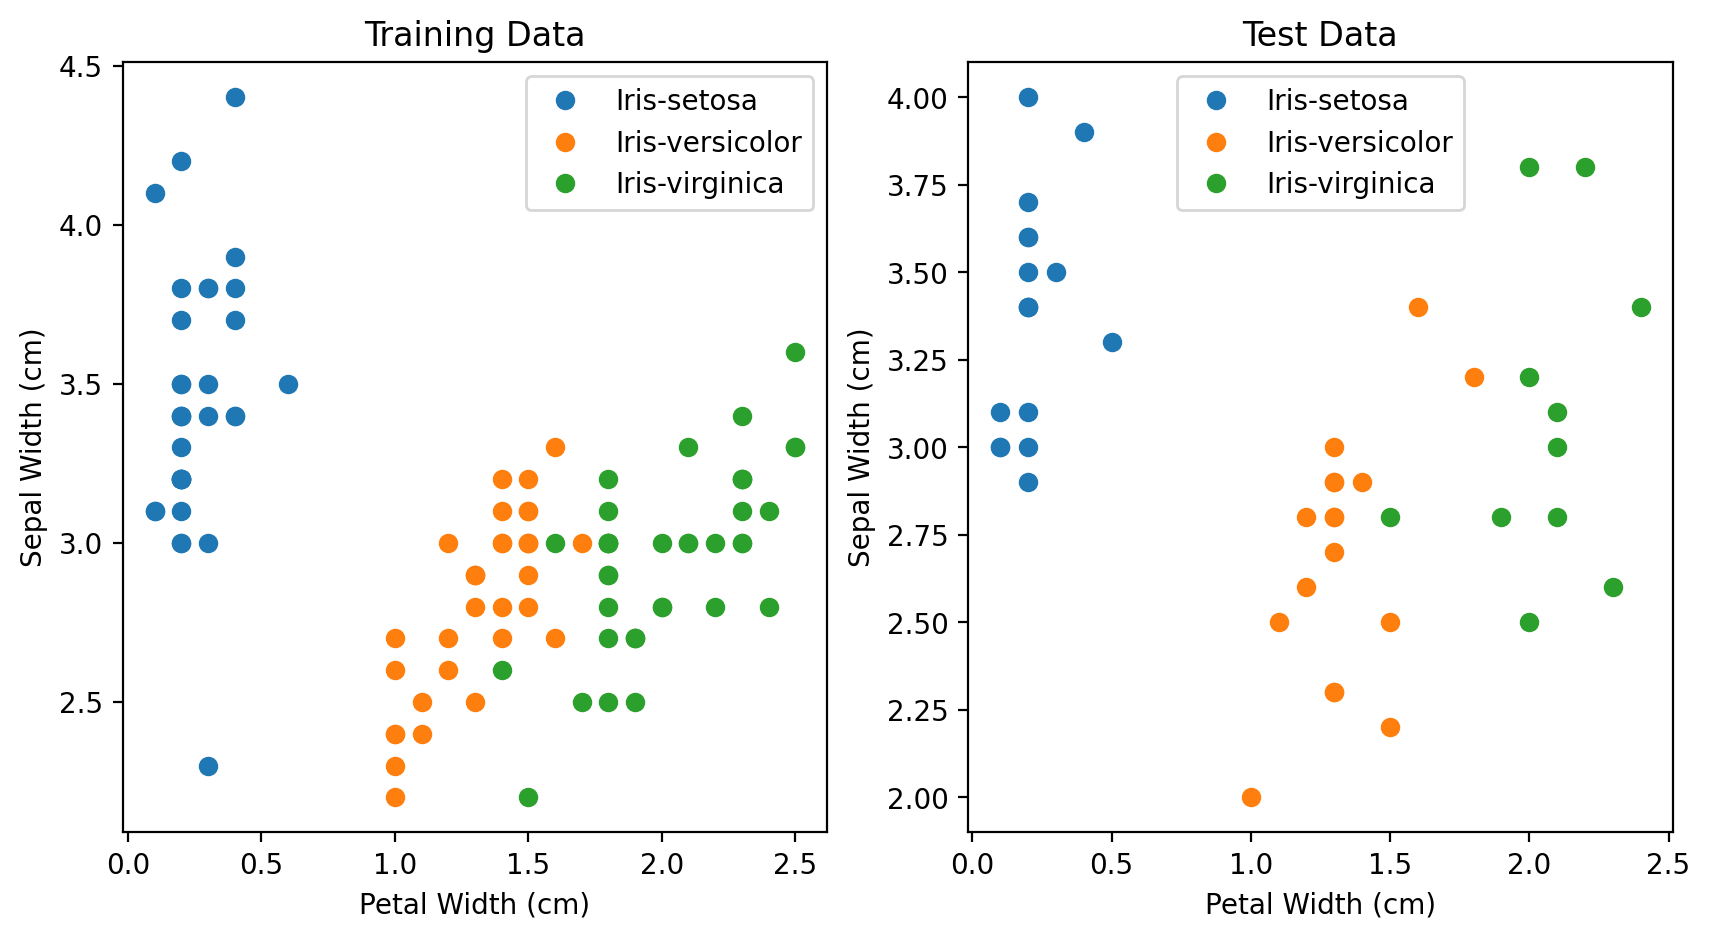

In [34]:
labels = ['Iris-setosa', 'Iris-versicolor' ,'Iris-virginica']

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,5))
plot_data_with_labels(ax1, data_train, labels, 'Training Data')
plot_data_with_labels(ax2, data_test, labels, 'Test Data')

But we need to add in the predictions to see how well this worked. Let' start by simply circling each test observation with the color of the class that was predicted for it. Let's add a column to our test dataframe that includes the prediction

In [35]:
data_predictions = data_test
data_predictions.insert(3,"prediction",y_prediction) # Adds the column to the 3rd index (becomes the 4th column)

In [36]:
data_predictions

,SepalWidthCm,PetalWidthCm,Species,prediction
0,3.0,0.1,Iris-setosa,Iris-setosa
1,3.4,0.2,Iris-setosa,Iris-setosa
2,2.6,2.3,Iris-virginica,Iris-virginica
3,2.3,1.3,Iris-versicolor,Iris-versicolor
4,2.9,1.4,Iris-versicolor,Iris-versicolor
5,2.9,0.2,Iris-setosa,Iris-setosa
6,2.8,1.2,Iris-versicolor,Iris-versicolor
7,3.4,0.2,Iris-setosa,Iris-setosa
8,2.5,2.0,Iris-virginica,Iris-virginica
9,3.7,0.2,Iris-setosa,Iris-setosa


In [37]:
data_predictions["correct"] = data_predictions["Species"] == data_predictions["prediction"]
data_predictions

,SepalWidthCm,PetalWidthCm,Species,prediction,correct
0,3.0,0.1,Iris-setosa,Iris-setosa,True
1,3.4,0.2,Iris-setosa,Iris-setosa,True
2,2.6,2.3,Iris-virginica,Iris-virginica,True
3,2.3,1.3,Iris-versicolor,Iris-versicolor,True
4,2.9,1.4,Iris-versicolor,Iris-versicolor,True
5,2.9,0.2,Iris-setosa,Iris-setosa,True
6,2.8,1.2,Iris-versicolor,Iris-versicolor,True
7,3.4,0.2,Iris-setosa,Iris-setosa,True
8,2.5,2.0,Iris-virginica,Iris-virginica,True
9,3.7,0.2,Iris-setosa,Iris-setosa,True


In [46]:
def plot_data_with_labels(ax, data, labels, title, colors, filled = True):
    # Loop through each of the class labels and plot them
    
    if filled:
        options = {'markersize':5}
    else:
        options = {'markersize':10,
                   'markerfacecolor':'none'}
    
    for label,color in zip(labels,colors):
        # Get the data that have that label
        data_subset = data.loc[data['Species'] == label]
        ax.plot(data_subset['PetalWidthCm'],data_subset['SepalWidthCm'],
                linestyle='',
                color=color,
                marker='o',
                label=label, 
                **options)
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel('Petal Width (cm)')
    ax.set_ylabel('Sepal Width (cm)')

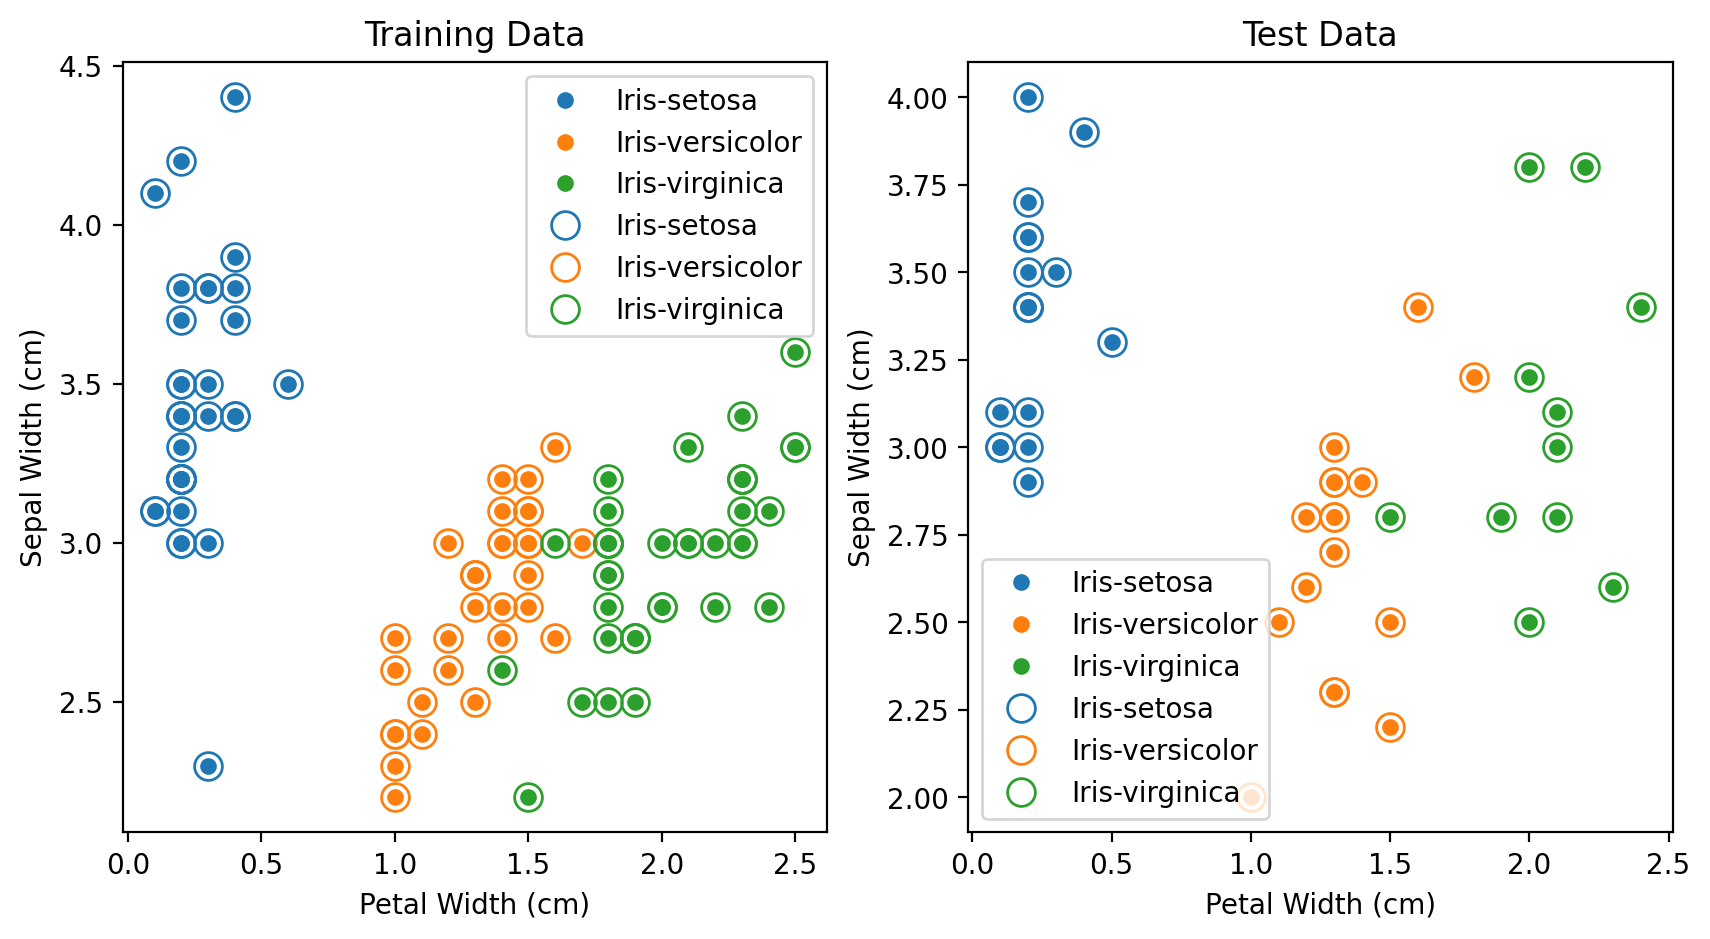

In [49]:
labels = ['Iris-setosa', 'Iris-versicolor' ,'Iris-virginica']
colors = ['tab:blue','tab:orange','tab:green']

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,5))
plot_data_with_labels(ax1, data_train, labels, 'Training Data', colors, filled = True)
plot_data_with_labels(ax1, data_train, labels, 'Training Data', colors, filled = False)
plot_data_with_labels(ax2, data_test, labels, 'Test Data', colors, filled = True)
plot_data_with_labels(ax2, data_test, labels, 'Test Data', colors, filled = False)